# 130.CIFAR-10 을 이용한 CNN 구축

- CIFAR-10 dataset 은 32x32 color image 를 가진 10개의 class (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck) 로 구성  


- 각 class 별 6,000 개씩 total 60,000 개의 image


- Image 가 blur 하여 난이도 높음 (최근 성적 : https://en.wikipedia.org/wiki/CIFAR-10)

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [0]:
cifa10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

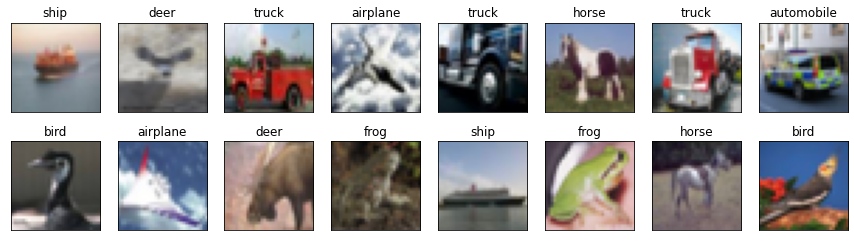

In [5]:
fig, axes = plt.subplots(2, 8, figsize=(15, 4))
axes = axes.ravel()
for i in range(16):
    idx = np.random.randint(0, len(y_train))
    axes[i].imshow(X_train[idx, :])
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title(cifa10_classes[y_train[idx, 0]])

In [0]:
# data normalization
X_train_scaled = X_train / 255.
X_test_scaled  = X_test / 255.

In [7]:
# one-hot encoding of class labels
y_train_onehot = utils.to_categorical(y_train)
y_test_onehot  = utils.to_categorical(y_test)
print(y_train_onehot.shape)
print(y_test_onehot.shape)

(50000, 10)
(10000, 10)


In [0]:
BATCH_SIZE = 512

train_ds = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train_onehot)).shuffle(10000).batch(BATCH_SIZE)
test_ds  = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test_onehot)).batch(BATCH_SIZE)

In [0]:
# model build
model = Sequential()

model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0

In [0]:
# model compile
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [12]:
%%time
history = model.fit(train_ds, epochs=50, validation_data=test_ds, verbose=1)

Epoch 1/50
98/98 [==============================] - 5s 48ms/step - loss: 1.9604 - accuracy: 0.2789 - val_loss: 1.7783 - val_accuracy: 0.3756
Epoch 2/50
98/98 [==============================] - 4s 39ms/step - loss: 1.6239 - accuracy: 0.4121 - val_loss: 1.5728 - val_accuracy: 0.4369
Epoch 3/50
98/98 [==============================] - 4s 39ms/step - loss: 1.4906 - accuracy: 0.4588 - val_loss: 1.4382 - val_accuracy: 0.4898
Epoch 4/50
98/98 [==============================] - 4s 39ms/step - loss: 1.3980 - accuracy: 0.4962 - val_loss: 1.3308 - val_accuracy: 0.5283
Epoch 5/50
98/98 [==============================] - 4s 39ms/step - loss: 1.3317 - accuracy: 0.5191 - val_loss: 1.2495 - val_accuracy: 0.5571
Epoch 6/50
98/98 [==============================] - 4s 38ms/step - loss: 1.2713 - accuracy: 0.5455 - val_loss: 1.1919 - val_accuracy: 0.5776
Epoch 7/50
98/98 [==============================] - 4s 38ms/step - loss: 1.2228 - accuracy: 0.5634 - val_loss: 1.1695 - val_accuracy: 0.5836
Epoch 8/50
98

In [13]:
model.evaluate(test_ds, verbose=0)

[0.7124078869819641, 0.7560999989509583]

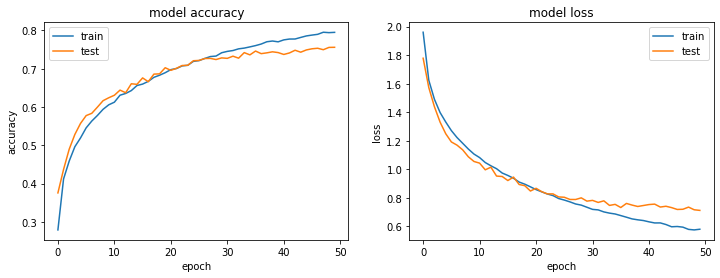

In [14]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])

In [20]:
y_pred = model.predict_classes(X_test_scaled)
print(y_pred.shape)
print(y_pred)

(10000,)
[3 8 8 ... 5 4 7]


In [21]:
y_true = y_test.ravel()
y_true

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

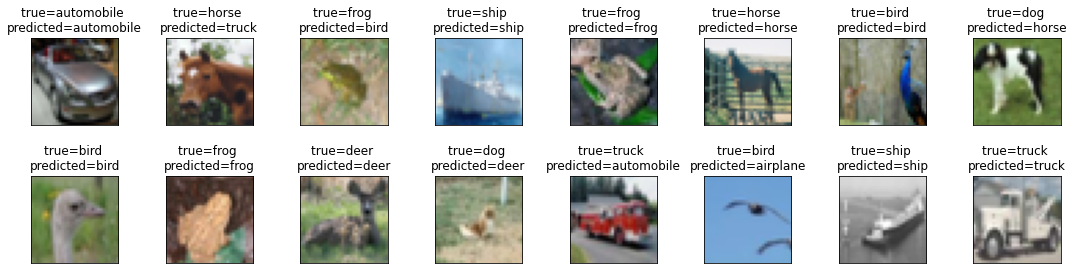

In [17]:
fig, axes = plt.subplots(2, 8, figsize=(15, 4))
axes = axes.ravel()
for i in range(16):
    idx = np.random.randint(0, len(y_test))
    axes[i].imshow(X_test[idx, :])
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title("true={} \npredicted={}".
                      format(cifa10_classes[y_true[idx]], cifa10_classes[y_pred[idx]]))
plt.tight_layout()

## accuracy 시각화

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
cm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


array([[771,  11,  49,  13,  14,   3,  11,  14,  89,  25],
       [  7, 856,   2,  10,   3,   6,   8,   4,  36,  68],
       [ 58,   4, 613,  55, 123,  42,  58,  22,  17,   8],
       [ 12,   8,  61, 547,  74, 142,  77,  38,  26,  15],
       [ 15,   4,  45,  35, 762,  20,  45,  66,   7,   1],
       [  8,   2,  50, 164,  61, 597,  35,  67,  12,   4],
       [  8,   3,  28,  40,  41,  12, 855,   4,   7,   2],
       [  9,   1,  28,  26,  51,  36,   7, 830,   3,   9],
       [ 31,  15,  11,  13,   8,   3,   4,   3, 901,  11],
       [ 32,  54,   5,  16,   5,   4,   5,  14,  36, 829]])

### heatmap 작성

Test Accuracy : 0.7561


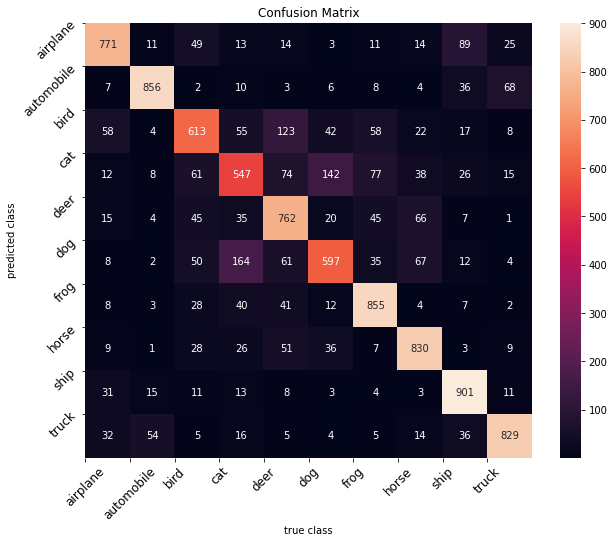

In [19]:
plt.figure(figsize=(10,8))

sns.heatmap(cm, annot=True, fmt='d')

plt.xticks(np.arange(10), cifa10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifa10_classes, rotation=45, fontsize=12)
plt.xlabel("true class")
plt.ylabel("predicted class")
plt.title('Confusion Matrix')
print('Test Accuracy :', accuracy_score(y_true, y_pred))

# 실습 :

## Convolutional Layer 와 Pooling Layer 를  추가하고 Hyper-parameter 조정하여 성능 개선 혹은 epochs 늘려서 accuracy 향상 비교